
#Xception Modified model for Skin Cancer prediction from an image
In this firs try I will just use the Xception model without the top  and add it a GlobalAveragePooling2D layer and two dense layers, the last one with 3 neurons to represent each one of the possible results:
* Melanoma
* Nevus
* Seborrheic Keratosis

## Differences with 1.4
* In this version we use a similar resolution that in version 1.3, but instead of using an square relationship between the width and the heigh, we will use a a relation af 1.332 that is closer to the original used status


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [5]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/ZoomCamp/Projects/Capstone 1/ISIC-images/train',
    target_size=(400, 533),
    batch_size=32
)

Found 600 images belonging to 3 classes.


In [6]:
train_ds.class_indices

{'melanoma': 0, 'nevus': 1, 'seborrheic_keratosis': 2}

In [7]:
X, y = next(train_ds)

In [8]:
y[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [9]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/ZoomCamp/Projects/Capstone 1/ISIC-images/val',
    target_size=(400, 533),
    batch_size=32,
    shuffle=False
)

Found 150 images belonging to 3 classes.


In [10]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(400, 533, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(400, 533, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(3)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [11]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Check TensorFlow GPU devices
print("TensorFlow GPU devices:", tf.config.experimental.list_physical_devices('GPU'))

Num GPUs Available:  0
TensorFlow GPU devices: []


In [12]:
scores={}
tf.debugging.set_log_device_placement(True)
model = make_model()
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
scores = history.history

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in

In [13]:
from pathlib import Path

def save_model_as_h5(model, directory_path, model_name):
    """
    Save a TensorFlow model as an HDF5 file (.h5).

    Parameters:
    - model: The TensorFlow model to be saved.
    - directory_path: The path to the directory where the model file will be saved.
    - model_name: The name of the model file (without extension).

    Example:
    save_model_as_h5(my_model, '/path/to/save', 'my_model')
    """
    # Create the directory if it doesn't exist
    Path(directory_path).mkdir(parents=True, exist_ok=True)

    # Construct the full path to save the model
    model_path = Path(directory_path) / f"{model_name}.h5"

    # Save the model
    model.save(model_path)

    print(f"Model saved to: {model_path}")

In [16]:
save_model_as_h5(model, '/content/drive/MyDrive/Colab Notebooks/ZoomCamp/Projects/Capstone 1', "capstone1-X1.5")

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /j

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /j

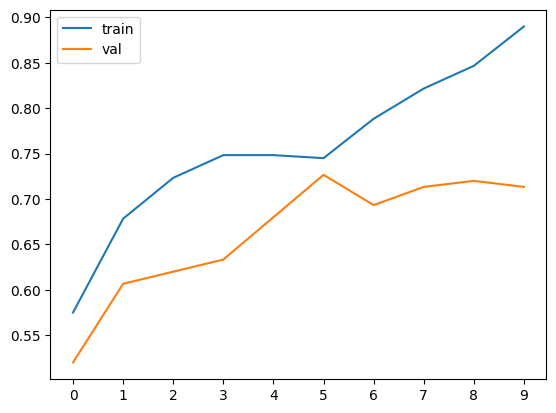

In [15]:
plt.plot(scores['accuracy'], label='train')
plt.plot(scores['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Conclusions
Besides de total resolution, using witdh/height ratio similar to the original images helps to improve the results and stibilized the Val accuracy after 5 epchs.